## Script that produces plot in the GRL paper
This script uses files produced by simulation and produce plots and stats for the GRL paper

In [88]:
import neuralsw.model.modeltools as model
import numpy as np
import os
from os.path import join
import glob
import xarray as xr
from neuralsw.model.modeltools import loadmymodel

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
from matplotlib import rc
rc('text', usetex=True)
rc('font',size=16)

#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True

In [48]:
## DEFINE FIGS TO PLOT
fig2plot = {'fig:scatter'}

In [25]:
## DEFINE PATHS

#Reference dataset (uncomment the one you want)

#rootdir
rootdir = os.path.realpath(\
    join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#directory to save figs
figdir = os.path.join(datadir,'fig_grl')




In [56]:


#input name
snet = {'uparam_nonoise_std',
        'uparam_noise01_std',
        'vparam_nonoise_std',
        'vparam_noise01_std'}


net = dict()

for n in snet:
    netname = 'nn0_' + n
    print('Name of the neural net:',netname)
    pklfile=glob.glob(os.path.join(datadir,netname,'*.pkl'))[0]
    h5file = glob.glob(os.path.join(datadir,netname,'*.h5'))[0]
    net[n] = loadmymodel(pklfile,modelfile=h5file)


Name of the neural net: nn0_vparam_noise01_std
Name of the neural net: nn0_uparam_noise01_std
Name of the neural net: nn0_vparam_nonoise_std
Name of the neural net: nn0_uparam_nonoise_std


In [107]:
## Load test data

#Test directory
testdir = dict()
#testdir = 'train_uparam_nonoise_std'
testdir['uparam_std'] = 'test_uparam_nonoise_std'
testdir['uparam_windlow'] = 'test_uparam_nonoise_windlow'

#testdir = 'test_uparam_nonoise_windvar'
#testdir = 'test_uparam_nonoise_warsmooth'
testdir['vparam_std'] = 'test_vparam_nonoise_std'
testdir['vparam_windlow'] = 'test_vparam_nonoise_windlow'

#testdir = 'test_vparam_nonoise_windvar'
#testdir = 'test_vparam_nonoise_warsmooth'

def same_param(d,n):
    return ('uparam' in d and 'uparam' in n) or\
            ('vparam' in d and 'vparam' in n)

if 'fig:scatter' in fig2plot:
    #load all the test datasets
    X_test = dict()
    y_test = dict()
    for d,path in testdir.items():
    #files containing inputs/outputs
        print(d,path)
        Xfile = join(datadir,path,'data_X.npy')
        yfile = join(datadir,path,'data_y.npy')
        X_test[d] = np.load(Xfile)
        y_test[d] = np.load(yfile)
    y_predict = dict()
    #Make a prediction for each neural net
    for n in snet:
        
        #find the corresponding test dataset
        dtest = {d for d in testdir if same_param(d,n)}
        for d in dtest:
            print('net : ',n ,'data:',d)
            y_predict[n+d] = net[n].predict(X_test[d])

uparam_std test_uparam_nonoise_std
uparam_windlow test_uparam_nonoise_windlow
vparam_std test_vparam_nonoise_std
vparam_windlow test_vparam_nonoise_windlow
net :  vparam_noise01_std data: vparam_windlow
net :  vparam_noise01_std data: vparam_std
net :  uparam_noise01_std data: uparam_windlow
net :  uparam_noise01_std data: uparam_std
net :  vparam_nonoise_std data: vparam_windlow
net :  vparam_nonoise_std data: vparam_std
net :  uparam_nonoise_std data: uparam_windlow
net :  uparam_nonoise_std data: uparam_std


<IPython.core.display.Javascript object>


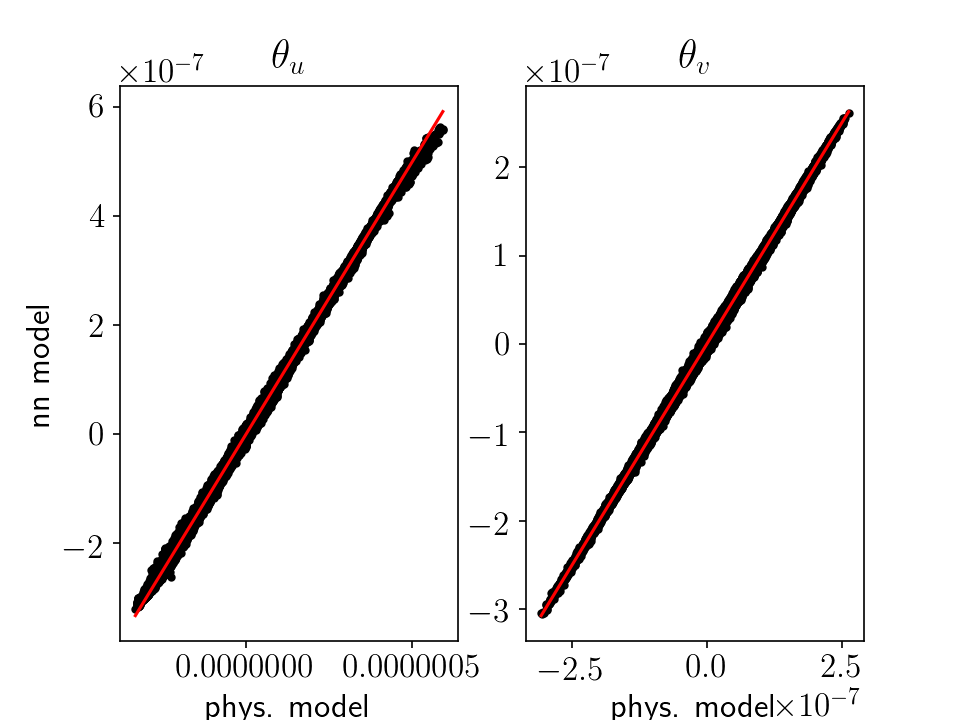


 uparam_noise01_std uparam_std
correlation= 9.999e-01
rms= 3.27e-09

 vparam_noise01_std vparam_std
correlation= 9.992e-01
rms= 2.04e-09

 uparam_nonoise_std uparam_std
correlation= 1.000e+00
rms= 1.07e-09

 vparam_nonoise_std vparam_std
correlation= 1.000e+00
rms= 5.24e-11

 uparam_noise01_std uparam_windlow
correlation= 9.997e-01
rms= 3.83e-09

 vparam_noise01_std vparam_windlow
correlation= 9.987e-01
rms= 1.78e-09

 uparam_nonoise_std uparam_windlow
correlation= 9.998e-01
rms= 2.68e-09

 vparam_nonoise_std vparam_windlow
correlation= 1.000e+00
rms= 4.71e-11


In [108]:
if 'fig:scatter' in fig2plot:

    figparam = [{'n':'uparam_noise01_std',
                 'd':'uparam_std',
                'iax':0,
                'param':r'$\theta_u$'},
               {'n':'vparam_noise01_std',
                'd':'vparam_std',
                'iax':1,
                'param':r'$\theta_v$'},
                {'n':'uparam_nonoise_std',
                 'd':'uparam_std',
                'iax':-1,
                'param':r'$\theta_u$'},
               {'n':'vparam_nonoise_std',
                'd':'vparam_std',
                'iax':-1,
                'param':r'$\theta_v$'},
                {'n':'uparam_noise01_std',
                 'd':'uparam_windlow',
                'iax':-1,
                'param':r'$\theta_u$'},
               {'n':'vparam_noise01_std',
                'd':'vparam_windlow',
                'iax':-1,
                'param':r'$\theta_v$'},
                {'n':'uparam_nonoise_std',
                 'd':'uparam_windlow',
                'iax':-1,
                'param':r'$\theta_u$'},
               {'n':'vparam_nonoise_std',
                'd':'vparam_windlow',
                'iax':-1,
                'param':r'$\theta_v$'}
               ]
    
    fig,ax = plt.subplots(ncols=2)
    
    for par in figparam:
        n = par['n']
        d = par['d']
        iax = par['iax']
        param = par['param']


        mini = min(y_test[d].ravel())
        maxi = max(y_test[d].ravel())

        #scatter plot
        yt = y_test[d].ravel()
        yp = y_predict[n+d].ravel()

        if iax>=0:
            ax[iax].plot(yt,yp,'.k')
            ax[iax].plot([mini,maxi],[mini,maxi],'r-')
            ax[iax].set_xlabel('phys. model')
            if iax==0:
                ax[iax].set_ylabel('nn model')
            ax[iax].set_title(param)

        #corrcoef
        print('\n',n,d)
        scor = '{0:3.3e}'.format(np.corrcoef(yt,yp)[0,1])
        print('correlation=',scor)
        #rms
        srms = '{0:3.2e}'.format(np.sqrt(np.mean(np.square(yt-yp))))
        print('rms=',srms)
    plt.savefig(join(figdir,'scatter.png'))


In [3]:
#Liste of simulation to plot and test
lfiles = {'noise01_std','noise01_warsmooth','noise01_windlow'}

#load datasets
d = dict()
for files in lfiles:
    name = files
    for suf in {'nn','00'}:
        f = glob.glob(os.path.join(datadir,'run_*'+name+'*'+suf+'.nc'))[0]
        d[name+suf] = xr.open_dataset(f)

In [4]:
#Compute diagnostic quantities
Ec = dict()
Ep = dict()
Pv = dict()
umax = dict()
for k in d:
    Ec[k] = model.cinetic_ener(ds=d[k])
    Pv[k] = model.potential_vor(ds=d[k])
    Ep[k] = model.potential_ener(ds=d[k])
    umax[k] = model.aumax(d[k])
    


In [5]:
## Compute intervals
def add_stats(dp,name,mean,std):
    dp[name+'_mean'].append(mean.statistic)
    dp[name+'_mean_delta'].append((mean.minmax[1]-mean.minmax[0])/2)
    dp[name+'_std'].append(std.statistic)
    dp[name+'_std_delta'].append((std.minmax[1]-std.minmax[0])/2)

dp = dict()
for k in {'mean','mean_delta','std','std_delta'}:
    dp['Ec_'+k] = []
    dp['Pv_'+k] = []
    dp['Ep_'+k] = []
    dp['umax_'+k] = []
index = []
for k in d:
    index.append(k)
    mean,_,std = stats.bayes_mvs(Ec[k][::5],alpha=0.99)
    add_stats(dp,'Ec',mean,std)
    mean,_,std = stats.bayes_mvs(Pv[k][::5],alpha=0.99)
    add_stats(dp,'Pv',mean,std)
    mean,_,std = stats.bayes_mvs(Ep[k][::5],alpha=0.99)
    add_stats(dp,'Ep',mean,std)
    mean,_,std = stats.bayes_mvs(umax[k][::5],alpha=0.99)
    add_stats(dp,'umax',mean,std)
    
df = pd.DataFrame(dp,index=index)
df.sort_index(inplace=True)
df

,Ec_mean,Ec_mean_delta,Ec_std,Ec_std_delta,Ep_mean,Ep_mean_delta,Ep_std,Ep_std_delta,Pv_mean,Pv_mean_delta,Pv_std,Pv_std_delta,umax_mean,umax_mean_delta,umax_std,umax_std_delta
noise01_std00,24.968866,1.057704,1.908804,0.788562,2544.704703,2.408074,4.345774,1.795320,7.332119e-08,1.302330e-10,2.350273e-10,9.709410e-11,50.916667,1.865827,3.367198,1.391052
noise01_stdnn,24.996693,1.055424,1.904689,0.786862,2545.010056,3.431818,6.193292,2.558563,7.338526e-08,1.756645e-10,3.170162e-10,1.309652e-10,50.666667,1.617877,2.919731,1.206195
noise01_warsmooth00,25.337868,1.116618,2.015125,0.832485,2544.487073,2.615383,4.719898,1.949877,7.336496e-08,1.503944e-10,2.714120e-10,1.121253e-10,50.458333,2.034664,3.671892,1.516926
noise01_warsmoothnn,24.355361,1.109920,2.003037,0.827492,2543.491432,2.376325,4.288478,1.771649,7.326562e-08,1.349837e-10,2.436007e-10,1.006360e-10,50.666667,1.564032,2.822559,1.166051
noise01_windlow00,11.802908,0.317452,0.572895,0.236674,2516.856835,0.766484,1.383248,0.571445,7.158999e-08,4.499698e-11,8.120461e-11,3.354712e-11,51.333333,0.749385,1.352392,0.558698
noise01_windlownn,11.985504,0.364056,0.657000,0.271419,2517.956044,0.800181,1.444061,0.596568,7.165258e-08,4.717060e-11,8.512728e-11,3.516765e-11,51.291667,0.726409,1.310926,0.541568


<IPython.core.display.Javascript object>


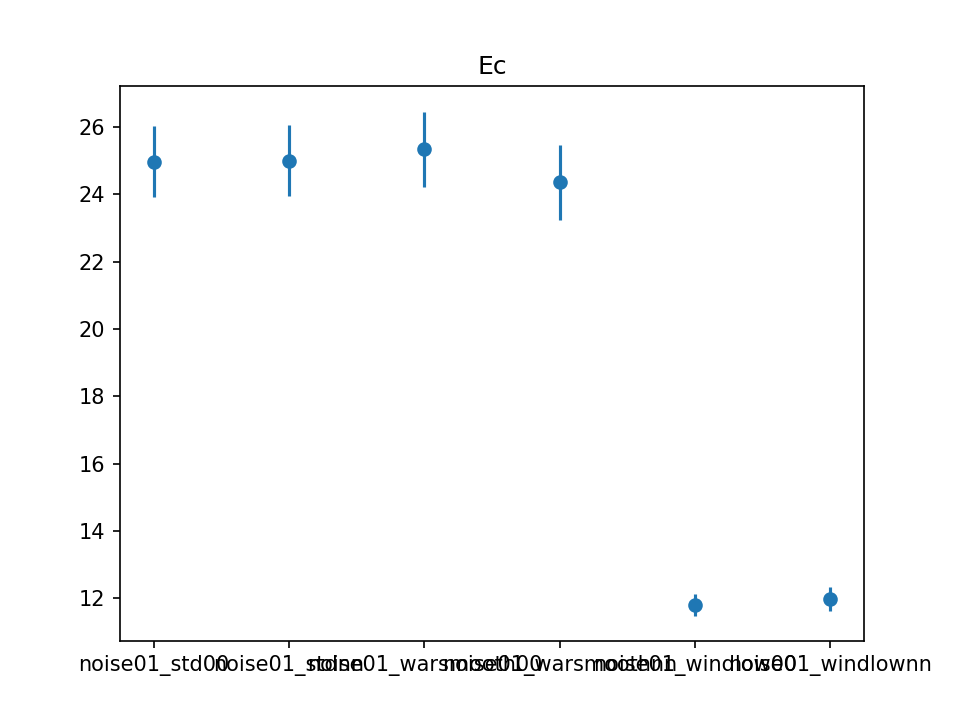

<IPython.core.display.Javascript object>


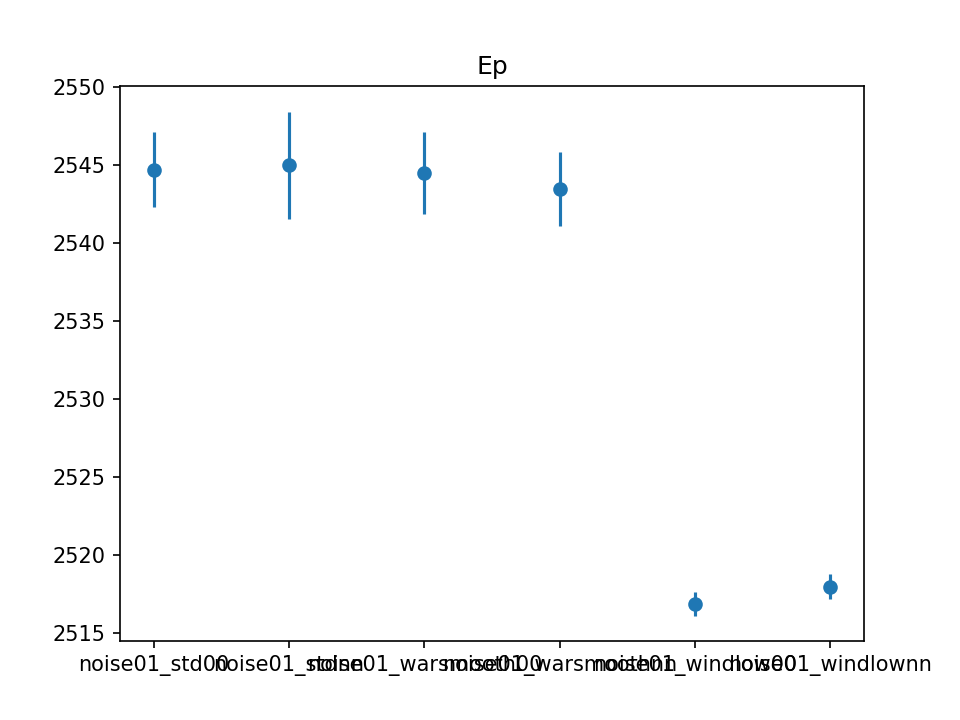

<IPython.core.display.Javascript object>


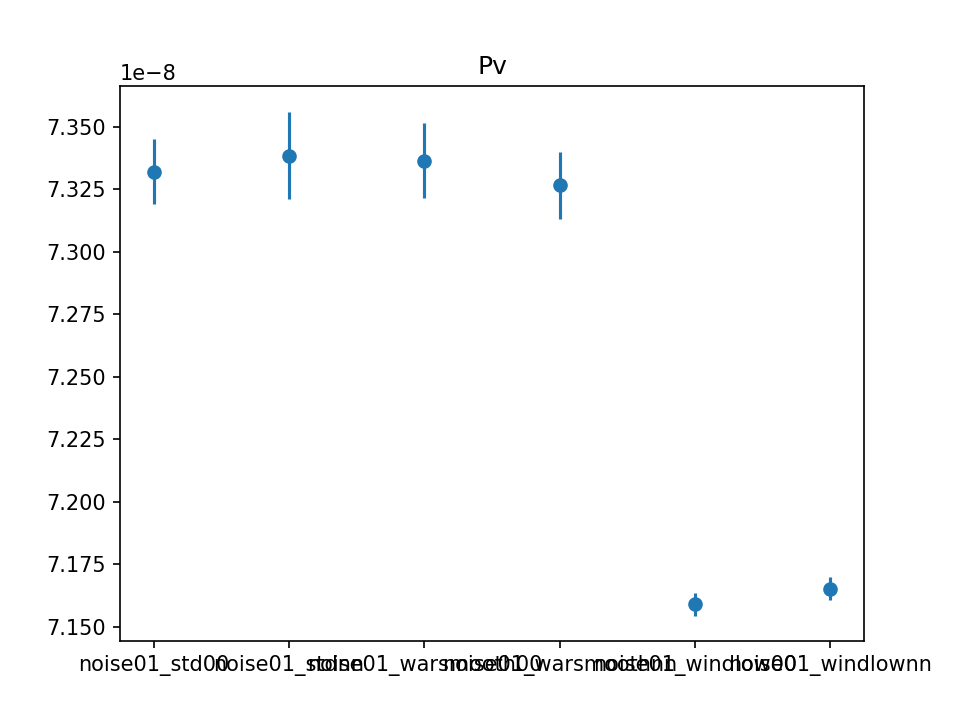

<IPython.core.display.Javascript object>


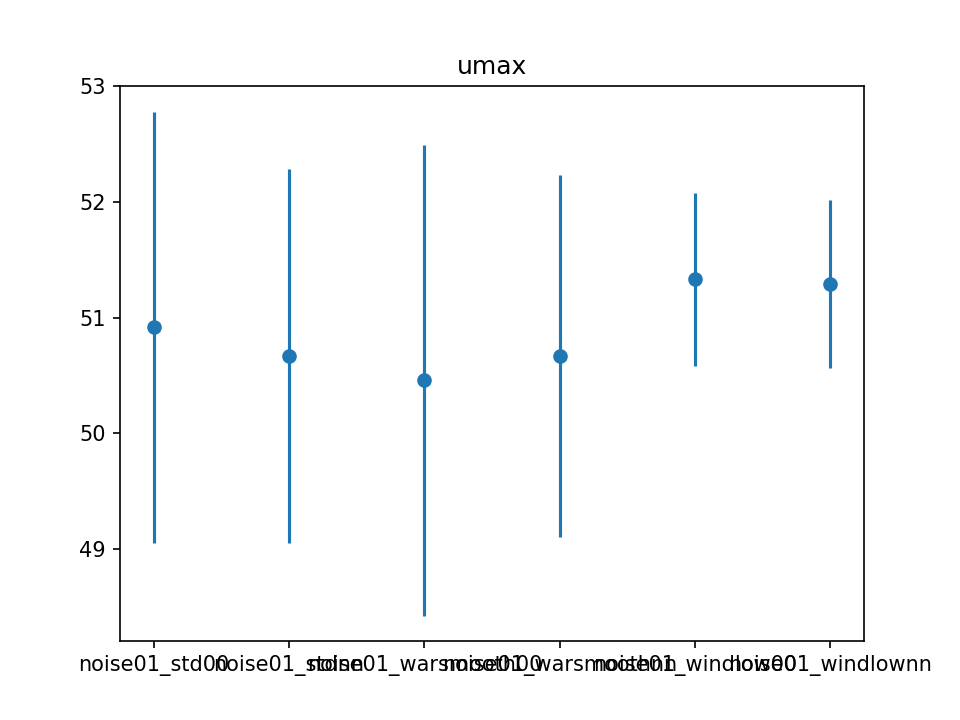

In [6]:
fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['Ec_mean'],yerr=df['Ec_mean_delta'],fmt='o')
ax.set_title('Ec')
plt.show()

fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['Ep_mean'],yerr=df['Ep_mean_delta'],fmt='o')
ax.set_title('Ep')
plt.show()
#df.index

fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['Pv_mean'],yerr=df['Pv_mean_delta'],fmt='o')
ax.set_title('Pv')
plt.show()
#df.index

fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['umax_mean'],yerr=df['umax_mean_delta'],fmt='o')
ax.set_title('umax')
plt.show()
#df.index


In [7]:
## test mean values at 95%
dp=dict()
dp['Ec']=[]
dp['Pv']=[]
dp['umax']=[]
dp['Ep']=[]
index = []
for f in lfiles:
    index.append(f)
    
print(index)

['noise01_windlow', 'noise01_std', 'noise01_warsmooth']


In [10]:
Ec['noise01_windlow00'][::5]


<xarray.DataArray (time: 24)>
array([11.64927 , 12.491202, 12.519046, 11.720195, 10.661655, 12.252154,
       12.16846 , 11.013973, 12.252031, 12.29085 , 10.703075, 11.722241,
       12.262951, 11.739325, 12.051083, 11.869297, 12.474014, 11.631493,
       11.163466, 11.733444, 12.187436, 11.534207, 12.15459 , 11.024334])
Coordinates:
  * time     (time) int64 0 7200 14400 21600 28800 36000 43200 50400 57600 ...